# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [90]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [ ]:
#working cell for testing json output and reading traverse

test_url= f'https://api.openweathermap.org/data/2.5/weather?q=Minneapolis&appid={weather_api_key}&units=metric'
test_response = requests.get(test_url).json()
pprint.pprint(test_response)


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [91]:
# Set the API base URL
url = f'api.openweathermap.org/data/2.5/forecast/daily?q={city}&appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    city_responses = requests.get(city_url).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_responses['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_responses['coord']['lat']
        city_lng = city_responses['coord']['lon']
        city_max_temp = city_responses['main']['temp_max']
        city_humidity = city_responses['main']['humidity']
        city_clouds = city_responses['clouds']['all']
        city_wind = city_responses['wind']['speed']
        city_country = city_responses['sys']['country']
        city_date = city_responses['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | fort nelson
Processing Record 4 of Set 1 | kattivakkam
Processing Record 5 of Set 1 | hofn
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | nyurba
Processing Record 9 of Set 1 | avera
Processing Record 10 of Set 1 | green river
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | najran
Processing Record 15 of Set 1 | la tuque
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | ati
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | luanda
Processing Record 21 of Set 1 | saint

In [92]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [93]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,12.06,58,75,12.86,CL,1675177118
1,fort nelson,58.8053,-122.7002,-14.23,90,100,3.60,CA,1675177119
2,kattivakkam,13.2167,80.3167,27.05,79,100,5.69,IN,1675177119
3,hofn,64.2539,-15.2082,1.18,70,100,11.15,IS,1675177119
4,busselton,-33.6500,115.3333,16.26,70,0,8.83,AU,1675177120


In [94]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/laceymorgan/Desktop/Python_API_Challenge/output_data/cities.csv", index_label="City_ID")

In [95]:
# Read saved data
city_data_df = pd.read_csv("/Users/laceymorgan/Desktop/Python_API_Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,12.06,58,75,12.86,CL,1675177118
1,fort nelson,58.8053,-122.7002,-14.23,90,100,3.60,CA,1675177119
2,kattivakkam,13.2167,80.3167,27.05,79,100,5.69,IN,1675177119
3,hofn,64.2539,-15.2082,1.18,70,100,11.15,IS,1675177119
4,busselton,-33.6500,115.3333,16.26,70,0,8.83,AU,1675177120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

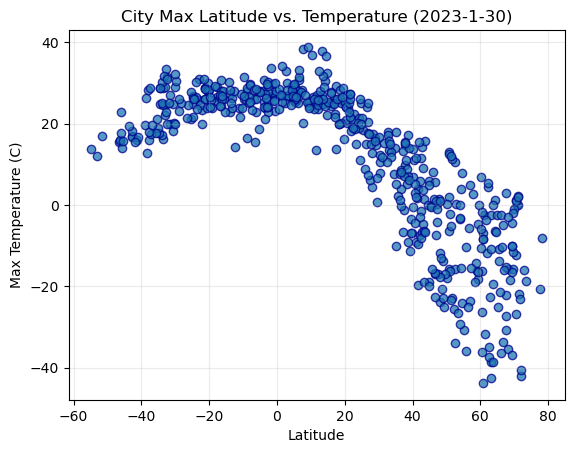

In [96]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='darkblue', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-1-30)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)
# Save the figure
plt.savefig("/Users/laceymorgan/Desktop/Python_API_Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

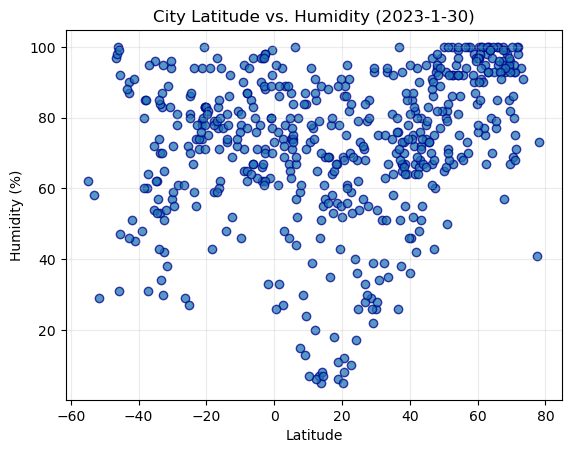

In [97]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='darkblue', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-1-30)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

# Save the figure
plt.savefig("/Users/laceymorgan/Desktop/Python_API_Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

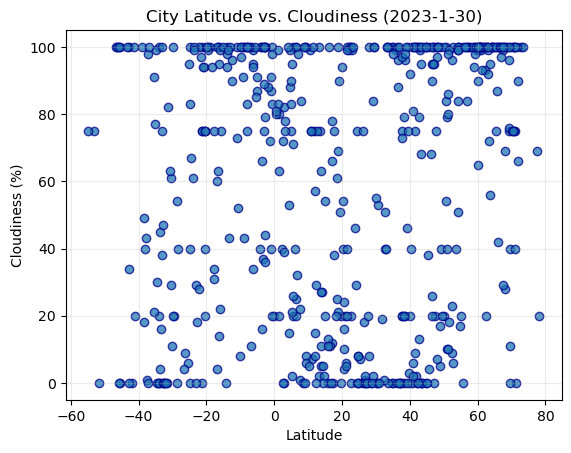

In [98]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='darkblue', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-1-30)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

# Save the figure
plt.savefig("/Users/laceymorgan/Desktop/Python_API_Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

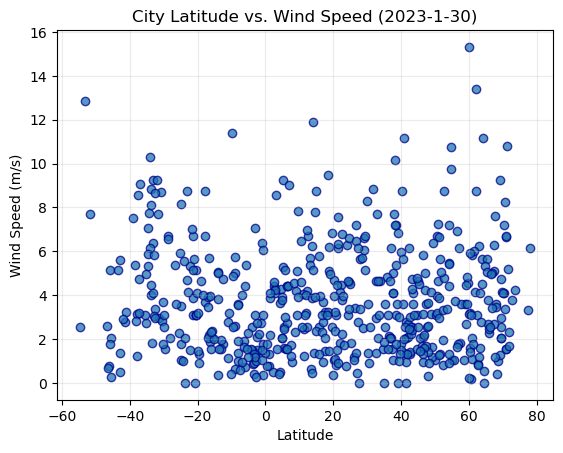

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='darkblue', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-1-30)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

# Save the figure
plt.savefig("/Users/laceymorgan/Desktop/Python_API_Challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) =  linregress(x, y)
# regress_values = x * slope + intercept

line_equation = f'y={slope}x + {intercept}'

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fort nelson,58.8053,-122.7002,-14.23,90,100,3.60,CA,1675177119
2,kattivakkam,13.2167,80.3167,27.05,79,100,5.69,IN,1675177119
3,hofn,64.2539,-15.2082,1.18,70,100,11.15,IS,1675177119
5,nyurba,63.2842,118.3319,-42.54,100,72,1.60,RU,1675177120
6,avera,33.1940,-82.5271,13.54,93,100,2.06,US,1675177121


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,12.06,58,75,12.86,CL,1675177118
4,busselton,-33.6500,115.3333,16.26,70,0,8.83,AU,1675177120
9,hermanus,-34.4187,19.2345,28.78,57,0,7.76,ZA,1675176919
10,puerto ayora,-0.7393,-90.3518,26.98,92,83,1.79,EC,1675176895
13,faanui,-16.4833,-151.7500,26.73,77,63,5.70,PF,1675176957


###  Temperature vs. Latitude Linear Regression Plot

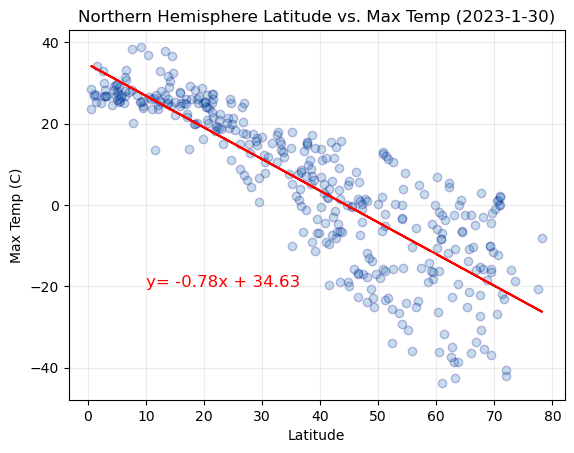

the r-value is -0.8510029526189038


In [103]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
n_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors='darkblue', alpha= 0.25)

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(n_line_equation, xy=(10,-20),fontsize=12,color='r')

plt.title('Northern Hemisphere Latitude vs. Max Temp (2023-1-30)')
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

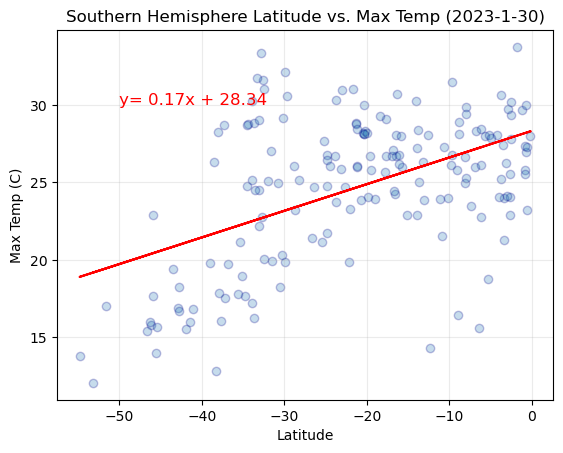

the r-value is 0.5013410716041916


In [106]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
s_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors='darkblue', alpha= 0.25)

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(s_line_equation, xy=(-50,30),fontsize=12,color='r')

plt.title('Southern Hemisphere Latitude vs. Max Temp (2023-1-30)')
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

**Discussion about the linear relationship:** The Northern Hemisphere Latitude vs. Max Temp graph is showing a strong negative correlation between max tempuratures getting the location's proximity to the equator (latitude 0). The r-value of -.85 clearly supports observation.  

The data from our Southern Hemisphere cities show a moderate positive correlation between the latitude and the maximum temperature of a location. This would also support the analysis of the Northern cities, for both datasets the closer that you get to the equator the warmer it gets. 

### Humidity vs. Latitude Linear Regression Plot

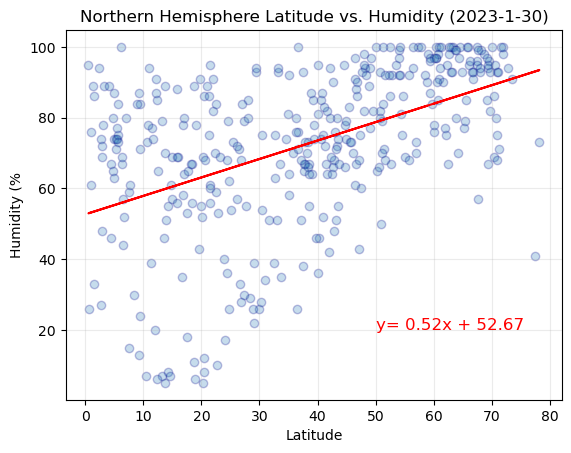

the r-value is 0.4773361823589764


In [108]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
nh_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='darkblue', alpha= 0.25)

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(nh_line_equation, xy=(50,20),fontsize=12,color='r')

plt.title('Northern Hemisphere Latitude vs. Humidity (2023-1-30)')
plt.ylabel('Humidity (%')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

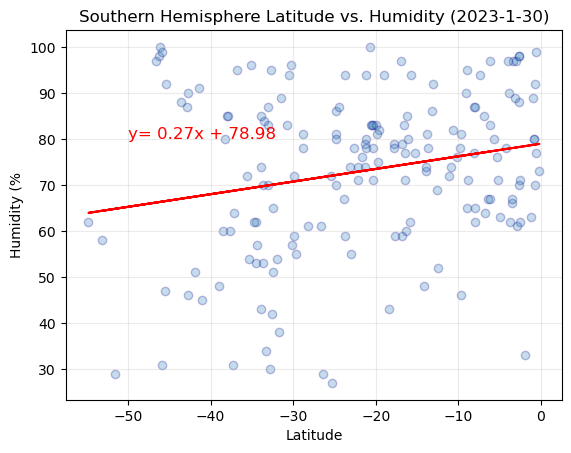

the r-value is 0.21921570021650746


In [111]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
sh_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='darkblue', alpha= 0.25)

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(sh_line_equation, xy=(-50,80),fontsize=12,color='r')

plt.title('Southern Hemisphere Latitude vs. Humidity (2023-1-30)')
plt.ylabel('Humidity (%')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

**Discussion about the linear relationship:** The Northern Hemisphere dataset shows a moderate positive correlation between latitudes getting more humid as they near the equator. The Southern Hemisphere dataset shows a weak positive correlation between these two data points. 

### Cloudiness vs. Latitude Linear Regression Plot

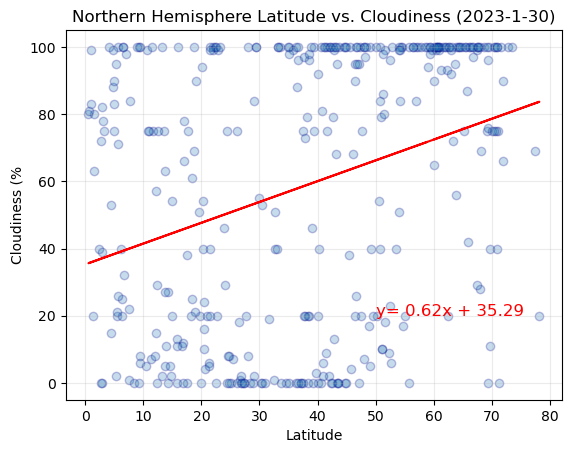

the r-value is 0.3209416477337995


In [113]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
nc_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors='darkblue', alpha= 0.25)

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(nc_line_equation, xy=(50,20),fontsize=12,color='r')

plt.title('Northern Hemisphere Latitude vs. Cloudiness (2023-1-30)')
plt.ylabel('Cloudiness (%')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

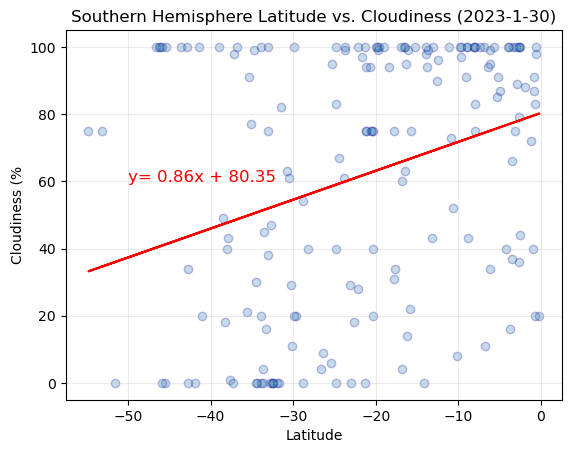

the r-value is 0.3104208071749645


In [119]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
sc_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors='darkblue', alpha= 0.25)

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(sc_line_equation, xy=(-50,60),fontsize=12,color='r')

plt.title('Southern Hemisphere Latitude vs. Cloudiness (2023-1-30)')
plt.ylabel('Cloudiness (%')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere datasets show weak correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

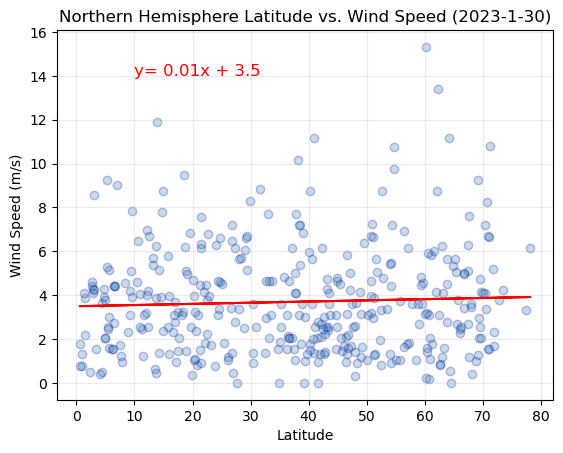

the r-value is 0.04604741954047365


In [120]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
nw_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors='darkblue', alpha= 0.25)

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(nw_line_equation, xy=(10,14),fontsize=12,color='r')

plt.title('Northern Hemisphere Latitude vs. Wind Speed (2023-1-30)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

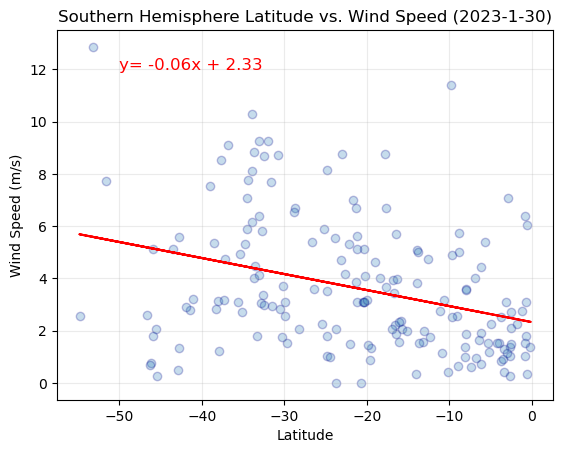

the r-value is -0.3329700345273805


In [122]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
sw_line_equation = f'y= {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='darkblue', alpha= 0.25)

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(sw_line_equation, xy=(-50,12),fontsize=12,color='r')

plt.title('Southern Hemisphere Latitude vs. Wind Speed (2023-1-30)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

plt.show()

print(f'the r-value is {rvalue}')

**Discussion about the linear relationship:** The Northern Hemisphere dataset is showing a very weak correlation between latitude and windspeed, there is no connection here. The Southern dataset shows as a weak negative correlation, so based on what I am seeing here I can't say that there is a correlation between city location and wind speed. 